In [71]:
# Origin: Code for week 4 of programming class.
# Author: Tyler Abbot
# Title: week_4_code.ipynb
# Last modified: 2016.08.04

NOTE: If you want to hide the code, use this:

http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/

# Introduction

Today's class will introduce you to **linear algebra in R**. The notes are written in the Jupyter notebook in order to make things easier to run in class, but the same code is available in an R script in the course repository.

If you would like to follow along using the notebook, you should install <a href="https://www.continuum.io/downloads" target="_blank">Anaconda</a> or<a href="http://conda.pydata.org/miniconda.html" target="_blank">MiniConda</a>. Then you should install the ipython notebook, R, and the R kernel. Run the following in a terminal:
```
conda install -c r ipython-notebook r-irkernel
```
This code will run just as well in RStudio, which you should also become familiar with.

## Today's Objective

Our goal for the day is to become familiar with the syntax of linear algebra. We would like to achieve the following objectives:
1. Review linear algebra (in 10 minutes or less).
2. Learn about vectors in R and discuss interpreters.
3. Learn about vector classes.
4. Discuss indexing issues.
7. Possibly introduce the dataframe.

If by the end of the class, you feel we haven't sufficiently covered one of these, speak up!

## A Working Example : Least Squares

**NOTE:** For mathematical background, see section 6.5 of the following (only one copy in the library, so be nice and make a photo copy):
* Lay, David C. *Linear Algebra and its Applications*. 4th ed. Pearson, 2012  

For the first of two sessions (not sequential) we will study the least squares problem. What the heck is least squares, you ask? It's essentially the only thing you will do for the rest of your career (with a few slight modifications).

The least squares problem is essentially to find the best straight line through a cloud of points. To see this visually, let's generate some random data.

We'll use a package (for the first time!) called ["MASS"](https://cran.r-project.org/web/packages/MASS/index.html). To load a package, you simply use the `require()` command. This will load all of the functions contained in that package into the namespace. Once this is done, we can use the `mvrnorm` function to generate a sample from a two dimensional, correlated nromal random variable:

In [44]:
# Load the package
# NOTE: Uncomment this line if need to install package
#install.packages("MASS", repos="http://cran.rstudio.com/")
require(MASS)

# Set the correlation parameter and mean
beta = 0.5
SIGMA = matrix(c(1,beta,beta,1), ncol=2)
MU = c(2.0, 1.0)

# Set the sample size
N = 50

# Draw your sample
out <- mvrnorm(N, mu = MU, Sigma = SIGMA)

Loading required package: MASS


In [45]:
# Look at a section of the data
dim(out)
out[1:10,]

[1] 50  2

3.463436,3.049150
1.022079,-2.067423
1.92516738,0.06249568
2.274310,1.467784
1.5502961,0.6025266
2.1791926,0.6020457
1.1940231,-0.5484682
0.06099111,-1.10965143
2.613273,1.753894
0.9338563,0.3564638


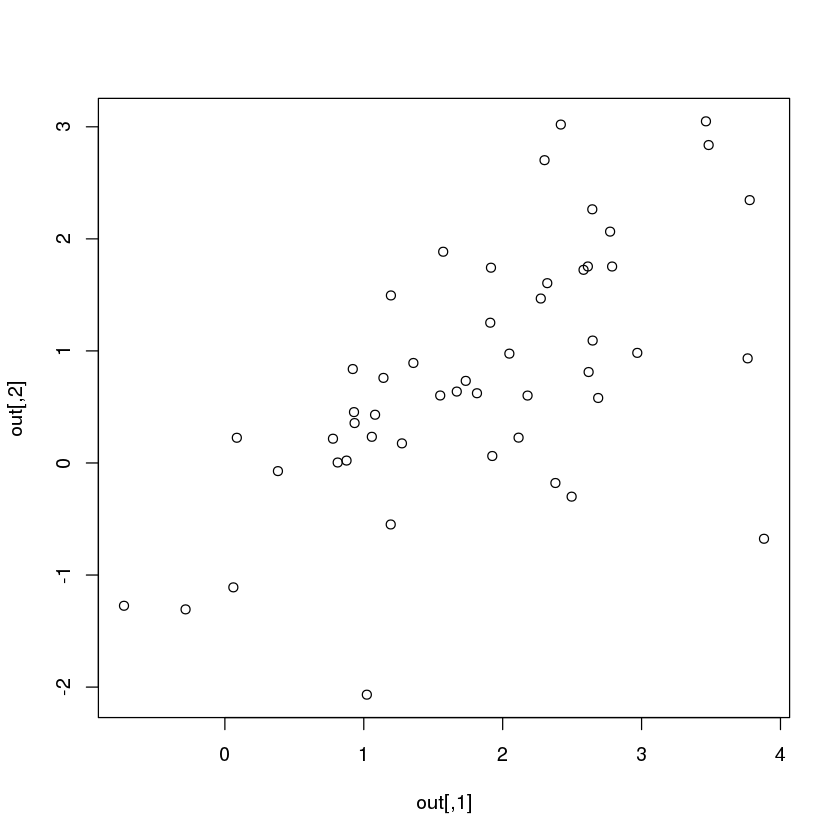

In [46]:
# Plot the random variables in the x-y plane
plot(out)

That's it! Now we have some data, you can think of it as whatever you would like: wealth vs. wages, income vs. education, grade vs. effort, popularity vs. effort in programming course, etc.

Now that we have this data, let's add a line to it:

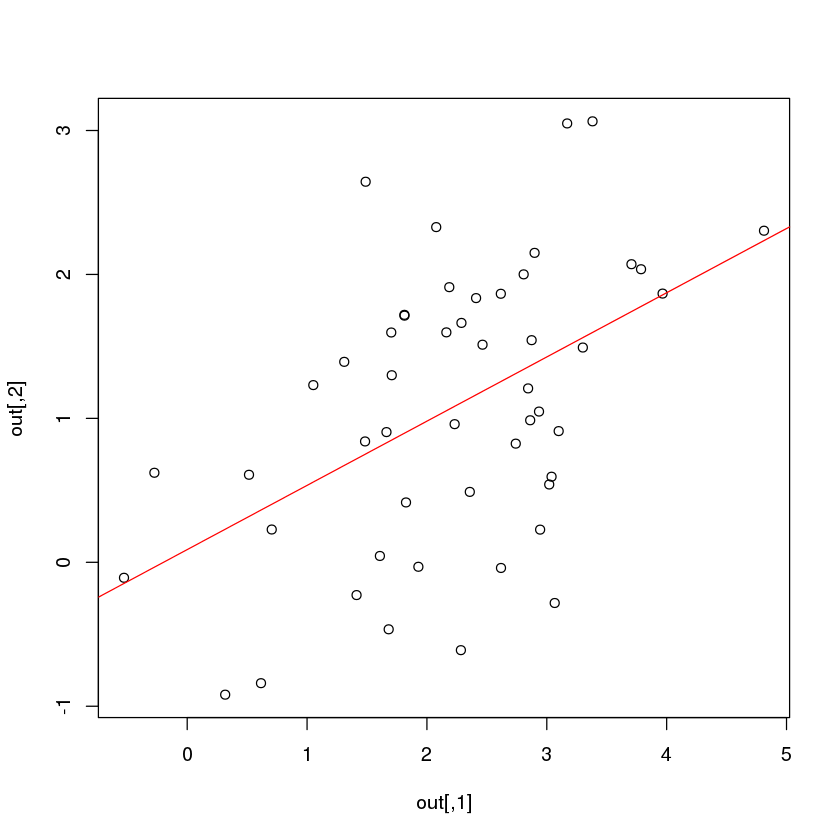

In [17]:
plot(out)
abline(lm(out[,2]~out[,1]), col="red") # regression line (y~x) 

Our goal is to generate this line ourselves. The line added to this plot is a linear regression line and R fits it using a statistical model. For now, we are not going to use a statistical model, but a geometric one.

The geometric argument goes as follows: we have data of the form $\{(x_i, y_i)\}_{i=1}^N$. We would like to find the value of $\beta$ such that our data satisfy $y_i \approx b x_i$ in some optimal sense.

We can write in matrix form our optimal approximation as $\hat{y} = X \beta$. This optimal approximation will be the point in the **columns space** of $X$ which is closest to the true value $y$. The difference between the approximation and the true value will be orthogonal to the columns of $X$. Using this we can write out the least square solution in the following way:
$$
X^T(y - \hat{y}) = 0
$$
by orthogonality, and thus
$$
X^T(y - X\beta) = 0
$$
Then the value of $\beta$ that gives the optimal approximation is the solution to the linear set of equations
$$
X^Ty = X^TX\beta
$$
or is given by the explicit formula
$$
\beta = (X^T X)^{-1}X^Ty
$$
If you are familiar with this topic, you'll notice that the prediction acquired by left multiplying $\beta$ by $X$ gives the projection of $y$ into the column space of $X$:
$$
\begin{align*}
\hat{y} &= X \beta\\
    &= X(X^T X)^{-1}X^Ty\\
    &= P_Xy
\end{align*}
$$
Later in the course we'll solve this problem using optimization and you will see that the solution is identical.

## Vectors in R and Interpreters
One of the main reasons we **need** to use vectors in R is speed. The built in functions in R and the linear algebra commands will always be faster than any code you can write in native R, as we've already seen. But, why is this so?

R can be referred to as an **interpreted language**, similar to Python. This is in contrast to languages like C++ which is **compiled** and Julia which is **just-in-time compiled**. This has two main effects, one good and one bad:

1. **An interpreted language is easy to use.** As you know, running R code is really easy. You just press `enter`. When you want to run compiled code, you have to first run the code through a compiler to generate an executable. Only then can you execute the code.

    This makes interpreted languages incredibly approachable and easy to learn. There is no more struggling with the compiler and creating make files, etc. It's for this reason that MIT recently shifted all of their introduction to programming courses to Python, an interpreted language.

2. **An interpreted language is comparatively slow.** One of the important elements of programming efficiency is function calls. Calling a a single funciton to calculate $1000$ multiplications is much faster than calling $1000$ functions to multiply $2$ numbers each.

    Interpreted languages have the drawback of needing to call the interpreter. The more often you need to call the interpreter, the slower your program will be. Although at this point you will most likely not notice these issues, you **will** some day write code that takes at least 24 hours to run. Then you will notice.
    
Ok, why are we talking about this under the heading of "vectors"? A vector is a list of values, **all of the same type**. Because of this, when R encounters a vector it only needs to check one entry to know if the vector is numeric, character, or logical. This isn't a problem for $10$ numbers, but what about $1,000,000$? The difference in the number of calls to the interpreter is $10^6$ times!

This is why vectors will work faster than loops. In fact, **everything in R is a vector!** Muahahah! You didn't even need to know any of this! But why does linear algebra work faster? Ah, now we're getting somewhere...

R uses what is called a **BLAS - basic linear algebra systems**. This is a library of **pre-compiled C code** which R calls in order to carry out linear algebra operations. So if you are running a sum as a loop, you are getting native R speeds, while if you re-express it as linear algebra, you get **C speed**. That is very, very fast.

Let's see an example of this at work. We'll calculate a sum using a `for` loop, using the built in `sum()` command, and using a dot product $\left(\sum x_i = x^T 1 \right)$:

In [4]:
# A loop sum function
loop_sum <- function(x){
    sum <- 0
    for(i in 1:length(x)){
        sum <- sum + x[i]
    }
    return(sum)
}
x <- rep(1, 1e1)

system.time(loop_sum(x))
system.time(sum(x))
system.time(rep(1,length(x))%*%x)

   user  system elapsed 
      0       0       0 

   user  system elapsed 
      0       0       0 

   user  system elapsed 
      0       0       0 

Here we've had our first encounter with the syntax of linear 
algebra. `%*%` is the operator for matrix product. **In R a vector is neither a column nor a row, so the matrix product of two vectors is always considered to be the dot product.**

You'll notice that the dot product takes longer than the native sum. This might be caused by generating the vector of ones. Let's look:

In [14]:
x <- rep(1, 10000000)

system.time(sum(x))
system.time(x%*%x)

   user  system elapsed 
   0.04    0.00    0.04 

   user  system elapsed 
  0.116   0.000   0.117 

Nope, it's still slower! Why? The dot product is carrying out both an elementwise multiplication and a summation. It will necessarily be slower because it is doing more computations.

## Vector Classes

Now that we understand why vectors are useful (and why everything in R is a vector), we should consider what type of vectors we could have. These are called **classes**. The class of a vector defines the type of data within. Let's take a look at the five basic vector classes:

In [21]:
class(c(1, 2))
class(c(TRUE, FALSE))
class(c('Im', 'a vector'))
class(c(1 + 1i, 2 + 1i))
class(as.integer(c(1, 2)))

[1] "numeric"

[1] "logical"

[1] "character"

[1] "complex"

[1] "integer"

There are also `raw` and `list` classes, but we will not use these in this course.

The class of a vector is important, because you cannot create a vector containing multiple data types:

In [23]:
class(c(1, '2'))

[1] "character"

This is closely related to the interpreter we discussed and the fact that R would like to be sure that all entries in a vector are same type.

## Indexing Issues
Now that we are really thinking about vectors, we should consider how indexing works in R. This is different in every language and can often cause unforseen difficulties and hidden issues should you make a mistake.

Let's look at an example vector:

In [25]:
x <- c(1:10)
x

[1]  1  2  3  4  5  6  7  8  9 10

If we would like to retrieve an item from within `x`, we reference it based on its **index**. In R, indexes start at `1` (as opposed to Python where they start at `0`):

In [27]:
x[1]
x[10]

[1] 1

[1] 10

We can also take a **slice** from the vector, which means to reference only a subset based on the index:

In [28]:
x[1:2]

[1] 1 2

Notice that the slice notation is **inclusive**, so slicing `1:100` would give you the `1` entry, the `100` entry, and everything in between.

What about for matrices?

In [31]:
X <- matrix(c(1, 2, 3, 4), nrow=2)
X

1,3
2,4


Notice how the items in the original vector were placed in the matrix. The `matrix` function generates a matrix from a vector using **Fortran Indexing**, which is to say the first index moves fastest. If you write the indices of the matrix as $(i, j)$, R will first fix $j=1$ and allow $i$ to change. Once all the rows are filled it will advance $j$ by $1$ and repeat. In pseudo code this looks like

~~~
vector_index = 1
for j in 1...J
    for i in 1...I
        matrix(i, j) = vector(vector_index)
        vector_index = vector_index + 1
~~~

This is opposed to **C Indexing**, which allows the last index to change fastest, giving the following pseudo code:


~~~
vector_index = 1
for i in 1...I
    for j in 1...J
        matrix(i, j) = vector(vector_index)
        vector_index = vector_index + 1
~~~

The difference is subtle, but the result is a transpose of the other matrix. Keep this in mind when you are creating matrices.

Once you have a matrix created you can reference it as you would a vector:

In [35]:
X[1, 1]
X[1, 1:2]
X[1:2, 1]

[1] 1

[1] 1 3

[1] 1 2

There is also a shorthand to select an entire column or row:

In [37]:
X[1,]
X[, 1]

[1] 1 3

[1] 1 2

## Solving The Least Squares Problem
So now we've gone over the nitty-gritty, let's go back to our example problem. Recall our data set and the value we want to calculate: $\beta = (X^TX)^{-1}X^Ty$. This will be a chance to learn some linear algebra commands, a [cheat sheet for which can be found here](http://www.statmethods.net/advstats/matrix.html).

Let's give it a whirl:

0.481088


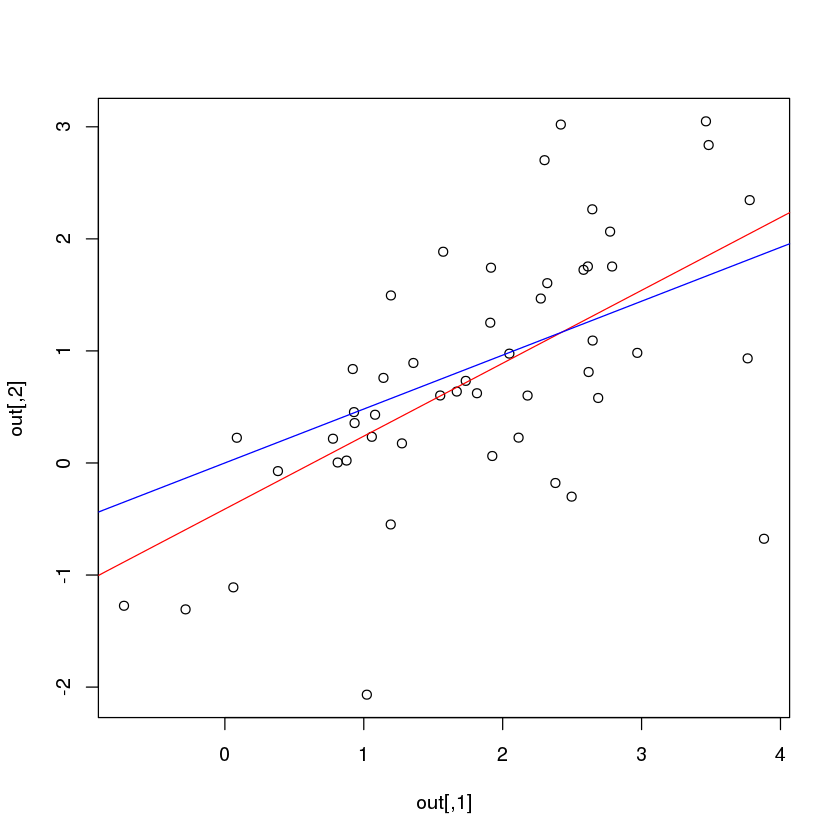

In [54]:
# Our data set is named `out`, which we split into y and X
y <- out[, 2]
X <- out[, 1]

# Now carry out intermediate calculations
XT = t(X)
XTX = XT%*%X
invXTX = solve(XTX)
XTy = XT%*%y
beta = invXTX %*% XTy
beta

# Now add this line to the plot
plot(out)
abline(lm(out[,2]~out[,1]), col="red") # regression line (y~x) 
abline(a=0, b=beta, col="blue")

Wait a second! Our answer is wrong!!!! Why?

There's another way to solve this problem that is faster... could that give us a better answer?

   user  system elapsed 
      0       0       0 

   user  system elapsed 
      0       0       0 

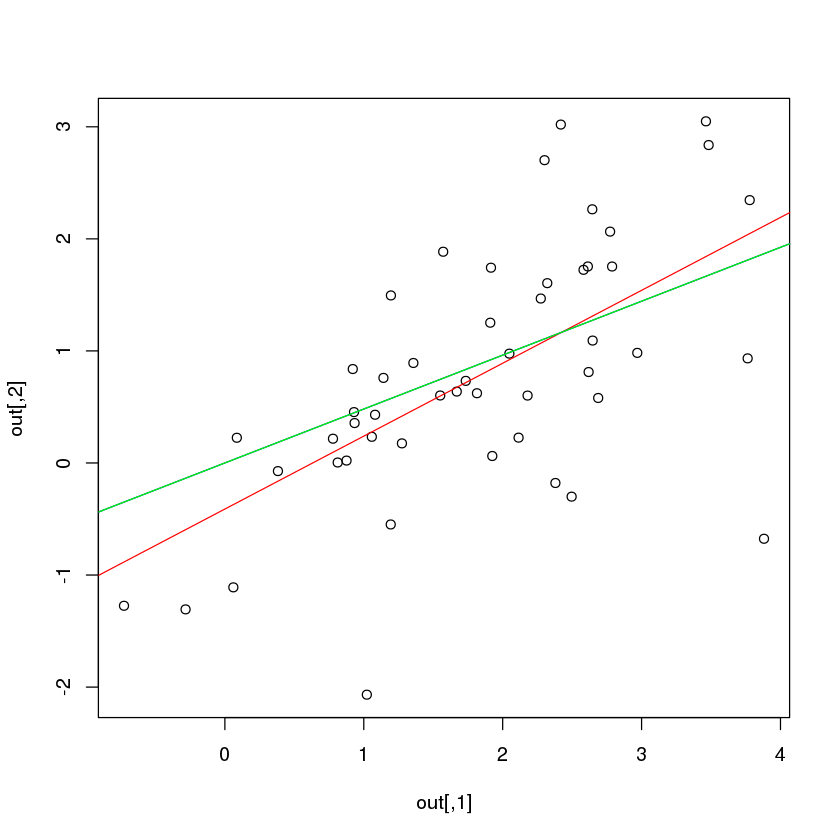

In [56]:
system.time(solve(XTX) %*% XTy)
system.time(solve(XTX, XTy))

beta2 = solve(XTX, XTy)
plot(out)
abline(lm(out[,2]~out[,1]), col="red") # regression line (y~x) 
abline(a=0, b=beta, col="blue")
abline(a=0, b=beta2, col="green")

Nope, still just as wrong!!!! You'll have to figure out what the problem is for the homework.

## Conclusion
That's it! That was a brief introduction to linear algebra in R, as well as a chance to try out linear regression. We should have covered the following:

1. Review linear algebra (in 10 minutes or less).
2. Learn about vectors in R and discuss interpreters.
3. Learn about vector classes.
4. Discuss indexing issues.
7. Possibly introduce the dataframe.

# Homework:

1. Figure out what's wrong with our least squares solution!
2. Rewrite the above code to give the correct answer.
3. Rewrite the above code to estimate the vector $\beta$ for a $3$ dimensional normal random variable. (**NOTE:** it is more complicated to predict the values of $\beta$ given the covariance matrix, so don't worry about it. You'll do it next semester in Metrics 2.)
3. Write a function which takes an arbitrarily large vector of means, a correlation matrix, and a sample size, and outputs the estimated vector $\beta$ and plots the sample with the least squares line (note: plotting this is going to be tricky for more than 3 dimensions, so don't worry about it).
4. Take a break, because you've probably had enough of me and need to submit your semester project ideas!